# Develop an NBD model using books01.csv. Report your code, the estimated parameters and the maximum value of the log-likelihood (and any other information you believe is relevant).

In [1]:
import pandas as pd
from scipy.stats import nbinom
from scipy.optimize import minimize
import numpy as np
from scipy.special import comb

<b>Read data<b>

In [2]:
df = pd.read_csv("books01.csv")
df.head()

,NumberofPurchases,NumberofPeople
0,1,753
1,2,362
2,3,175
3,4,126
4,5,82


<b>Define functions needed<b>

In [3]:
# Preparing the data
x = df['NumberofPurchases']
y = df['NumberofPeople']

# Negative Binomial Distribution Log-Likelihood Function
def nbd_log_likelihood(params):
    r, p = params
    # Ensuring parameters are within a valid range
    if r <= 0 or p <= 0 or p >= 1:
        return np.inf
    # Calculating the log-likelihood
    ll = np.sum(nbinom.logpmf(x, r, p) * y)
    # Since we minimize, return negative log-likelihood
    return -ll


<b>Call the optimizer</b>

In [4]:
# Initial parameter guesses
initial_params = [1, 0.5]
# Minimizing the negative of the log-likelihood
result = minimize(nbd_log_likelihood, initial_params, method='Nelder-Mead')

<b>Review the result</b>

In [5]:
# Extracting the estimated parameters and log-likelihood
estimated_r, estimated_p = result.x
max_log_likelihood = -result.fun

estimated_r, estimated_p, max_log_likelihood

(1.2024853978709973, 0.23548107891413683, -4483.172478446997)

<b>The estimated parameters for Poisson model: shape_n = 1.2024, alpha = 0.235 and with the maximum value of the log-likelihood being approximately -4483.17<b>

<hr style="border:2px solid black">
<b> QUESTION 5 (1): Develop an NBD model using books02.csv (again, ignoring the variables available). Report your code, and confirm that the estimated parameters and the maximum value of the log-likelihood are identical to those obtained with the NBD model developed using books01.csv.<b>
<hr style="border:2px solid black">

<b>Read data<b>

In [6]:
data_books02 = pd.read_csv("books02.csv")
data_books02.head()


,userid,education,region,hhsz,age,income,child,race,country,number_of_books_purchased
0,6365661,5.0,1.0,2,11.0,7,0,1,0,1
1,6396922,2.0,2.0,2,8.0,4,0,1,0,1
2,8999933,4.0,3.0,5,10.0,3,1,1,0,1
3,9573834,NaN,4.0,2,10.0,5,1,1,0,2
4,9576277,NaN,1.0,3,8.0,7,1,1,0,5


<b>Define funtions needed<b>

In [7]:
# Creating the frequency distribution for 'books02.xlsx'
# Grouping by 'number_of_books_purchased' and counting the number of users
freq_dist_books02 = data_books02.groupby('number_of_books_purchased').size().reset_index(name='NumberofPeople')
freq_dist_books02.columns = ['NumberofPurchases', 'NumberofPeople']

# Defining x_books02 and y_books02 with the correct frequency distribution
x_books02 = freq_dist_books02['NumberofPurchases']
y_books02 = freq_dist_books02['NumberofPeople']

# Define the constrained log-likelihood function
def constrained_nbd_log_likelihood(params):
    r, p = params
    if r <= 0 or p <= 0 or p >= 1:
        return np.inf
    ll = np.sum(nbinom.logpmf(x_books02, r, p) * y_books02)
    return -ll

<b>Call the optimizer</b>

In [8]:
# Initial parameter guesses
initial_params_constrained = [1, 0.5]
# Running the optimization with the correctly defined variables
result_books02_constrained = minimize(constrained_nbd_log_likelihood, initial_params_constrained, method='Nelder-Mead')

<b>Review the result</b>

In [9]:
# Extracting the estimated parameters and log-likelihood for the constrained model
estimated_r_books02_constrained, estimated_p_books02_constrained = result_books02_constrained.x
max_log_likelihood_books02_constrained = -result_books02_constrained.fun

estimated_r_books02_constrained, estimated_p_books02_constrained, max_log_likelihood_books02_constrained

(1.2024853978709973, 0.23548107891413683, -4483.172478446997)

<b><b>The estimated parameters for Poisson model: shape_n = 1.2024, alpha = 0.235 and with the maximum value of the log-likelihood being approximately -4483.17<b><b>

# Predict the number of people with 0, ..., 20, 20+ visits based on the NBD model. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted number of visits.  

<b>Define function to make predictions<b>

In [10]:
# Total number of people in the dataset
total_people = y_books02.sum()

# Function to calculate the probability for a given number of visits using the NBD PMF
def nbd_probability(k, r, p):
    return comb(k + r - 1, k) * (p ** r) * ((1 - p) ** k)


<b>Make predictions<b>

In [11]:
# Calculating the probability and predicted number of people for 0 to 20 visits
predicted_counts = {}
for k in range(21):
    prob = nbd_probability(k, estimated_r_books02_constrained, estimated_p_books02_constrained)
    predicted_counts[k] = prob * total_people

# For 20+ visits, sum the probabilities for all visits greater than 20
prob_20_plus = sum(nbd_probability(k, estimated_r_books02_constrained, estimated_p_books02_constrained) for k in range(21, 1000))
predicted_counts['20+'] = prob_20_plus * total_people

# Calculation for 2 visits as an example
prob_2_visits = nbd_probability(2, estimated_r_books02_constrained, estimated_p_books02_constrained)
predicted_2_visits = prob_2_visits * total_people

predicted_2_visits, prob_2_visits, predicted_counts

(246.424454840264,
 0.1359958360045607,
 {0: 318.3790441331019,
  1: 292.69312673113524,
  2: 246.424454840264,
  3: 201.1119820368446,
  4: 161.5371462140357,
  5: 128.49952136342364,
  6: 101.55568699237877,
  7: 79.88713256855686,
  8: 62.621079539042135,
  9: 48.952109994950696,
  10: 38.18261215996343,
  11: 29.728676539923253,
  12: 23.111645347182478,
  13: 17.944503492210785,
  14: 13.917332409690143,
  15: 10.783694463846894,
  16: 8.348673341358095,
  17: 6.4587426967653405,
  18: 4.993377591117264,
  19: 3.8582155651004975,
  20: 2.97954214542941,
  '20+': 10.031699833679994})

### The predicted values are obtained using the case of 2 exposures is 246.424 .<b>

<b> Graph the original and predicted number of visits.<b>

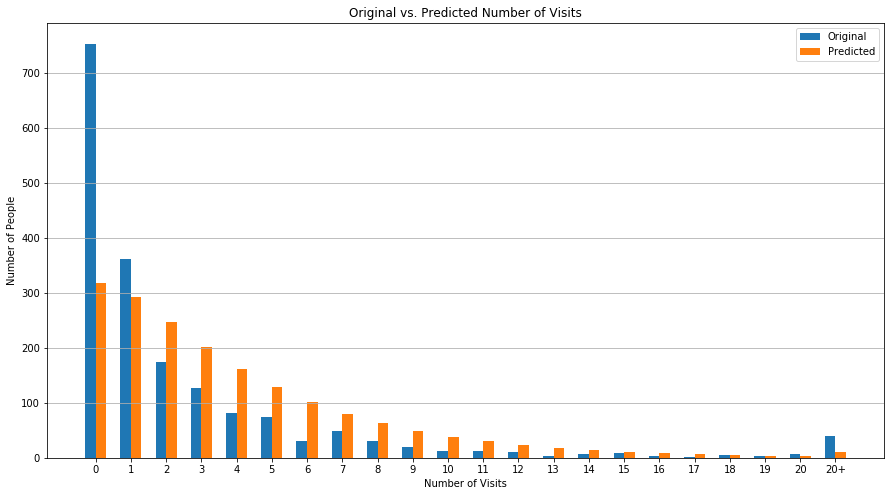

In [15]:
import matplotlib.pyplot as plt

# Extracting the original number of people for each number of visits
original_counts = y_books02.to_dict()

# Preparing data for plotting
visits = list(range(21)) + ['20+']
original_values = [original_counts.get(k, 0) for k in visits[:-1]] + [sum(original_counts.get(k, 0) for k in range(21, max(original_counts.keys()) + 1))]
predicted_values = [predicted_counts.get(k, 0) for k in visits]

# Plotting
plt.figure(figsize=(15, 8))
plt.bar([v - 0.15 for v in range(len(visits))], original_values, width=0.3, label='Original', align='center')
plt.bar([v + 0.15 for v in range(len(visits))], predicted_values, width=0.3, label='Predicted', align='center')
plt.xlabel('Number of Visits')
plt.ylabel('Number of People')
plt.xticks(ticks=range(len(visits)), labels=visits)
plt.title('Original vs. Predicted Number of Visits')
plt.legend()
plt.grid(axis='y')
plt.show()


### The graph above displays a comparison between the original and predicted number of people for each number of visits, ranging from 0 to 20 and including a category for 20+ visits. The bars represent the count of people for each category:

### The blue bars indicate the original number of people for each number of visits, as per the dataset.
### The orange bars represent the predicted number of people based on the Negative Binomial Distribution (NBD) model with the estimated parameters.

# Calculate the values of (i) reach, (ii) average frequency, and (iii) gross ratings points (GRPs) based on the NBD model. Show your work.

In [13]:
# Calculating Reach (excluding 0 visits)
reach = sum(predicted_values[1:])  # excluding the 0 visit category

# Calculating Total Number of Visits
total_visits = sum(k * predicted_counts.get(k, 0) for k in range(21)) + 20 * predicted_counts['20+']

# Calculating Average Frequency
average_frequency = total_visits / reach if reach != 0 else 0

# Calculating GRPs
# Reach percentage (reach as a percentage of total population)
reach_percentage = (reach / total_people) * 100 if total_people != 0 else 0

# GRPs = Reach (%) × Average Frequency
grps = reach_percentage * average_frequency

reach, average_frequency, grps


(1493.6209558668986, 4.706985984525824, 387.9940897052735)

## Based on the predicted values from the NBD model, I have calculated the following metrics:

## Reach: Approximately 1493.62 people. This represents the number of different individuals who made at least one visit.

## Average Frequency: Approximately 4.71 times. This indicates that, on average, each person in the reached audience made about 4.71 visits.

## Gross Ratings Points (GRPs): Approximately 388.00. This value represents the sum of ratings achieved, indicating the total number of exposures to the audience as a percentage of the audience size, multiplied by the average frequency.

